### Objective

### Breast Cancer detection using CNN and pretrained models

In [2]:
# Import nessarry libraries
import numpy as np 
import keras
import os , shutil
from keras.preprocessing import image
import tensorflow
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
from keras.preprocessing import image

## Data Aquisition

In [15]:
# Base dataset directory
base_dir = r"C:\Users\Muhammad yasir Ali\OneDrive\Desktop\BreastProject\BreastCancer"


# Directories for our training,validation and test

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# Define subdirectories
train_Malignant_dir = os.path.join(train_dir, 'Malignant')
train_Benign_dir = os.path.join(train_dir, 'Benign')

validation_Malignant_dir = os.path.join(validation_dir, 'Malignant')
validation_Benign_dir = os.path.join(validation_dir, 'Benign')

test_Malignant_dir = os.path.join(test_dir, 'Malignant')
test_Benign_dir = os.path.join(test_dir, 'Benign')

In [16]:
print('total training Malignant images:', len(os.listdir(train_Malignant_dir)))
print('total training Benign images:', len(os.listdir(train_Benign_dir)))

print('total testing Malignant images:', len(os.listdir(test_Malignant_dir)))
print('total testing Benign images:', len(os.listdir(test_Benign_dir)))

print('total validation Malignant images:', len(os.listdir(validation_Malignant_dir)))
print('total validation Benign images:', len(os.listdir(validation_Benign_dir)))

total training Malignant images: 803
total training Benign images: 1000
total testing Malignant images: 500
total testing Benign images: 500
total validation Malignant images: 500
total validation Benign images: 500


## CNN

# Building a network

In [17]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

C:\anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

## compile the model 

In [18]:
from keras import optimizers

model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)


## Data preprocessing

In [19]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1803 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print
    ('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)


## Fitting the model

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

C:\anaconda3\envs\deeplearning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 91/100 ━━━━━━━━━━━━━━━━━━━━ 6s 677ms/step - acc: 0.5593 - loss: 0.6905  

C:\anaconda3\envs\deeplearning\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 90s 865ms/step - acc: 0.5594 - loss: 0.6902 - val_acc: 0.5420 - val_loss: 0.6879
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - acc: 0.6001 - loss: 0.6802
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 337ms/step - acc: 0.6032 - loss: 0.6727 - val_acc: 0.5670 - val_loss: 0.6815
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - acc: 0.6040 - loss: 0.6656
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 344ms/step - acc: 0.6357 - loss: 0.6478 - val_acc: 0.5830 - val_loss: 0.6682
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step - acc: 0.6340 - loss: 0.6392
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 338ms/step - acc: 0.6476 - loss: 0.6358 - val_acc: 0.5990 - val_loss: 0.6674
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 266ms/step - acc: 0.6226 - loss: 0.6409
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 351ms/step - acc: 0.6341 - loss: 0.6302 - val_acc: 0.5980 - val_loss: 0.6672
Epoch 10/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 252ms/step - acc: 0.6458 

## model deployement

In [22]:
 model.save('Breast CNN .h5')

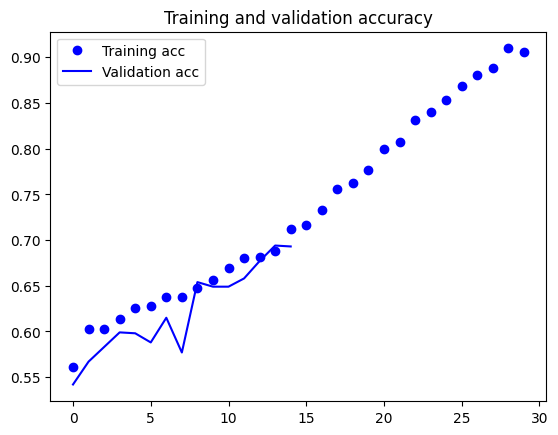

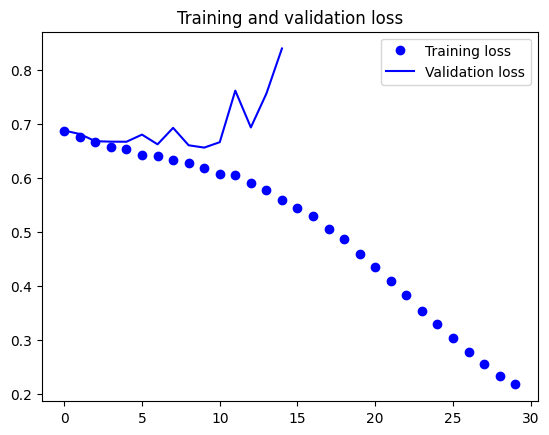

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
val_epochs = range(len(val_acc))  # Use actual length of val_acc

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(val_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(val_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## using Data augmentation

In [24]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

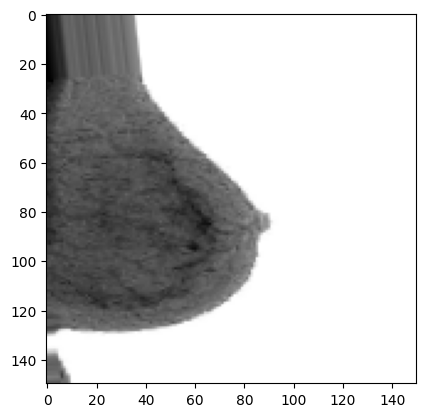

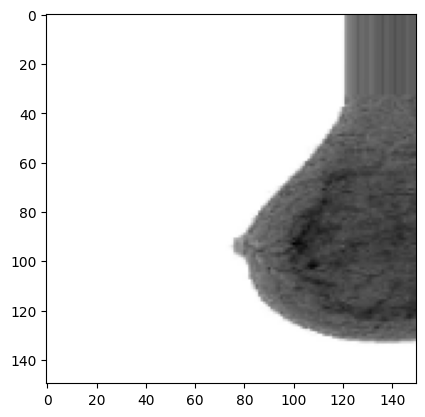

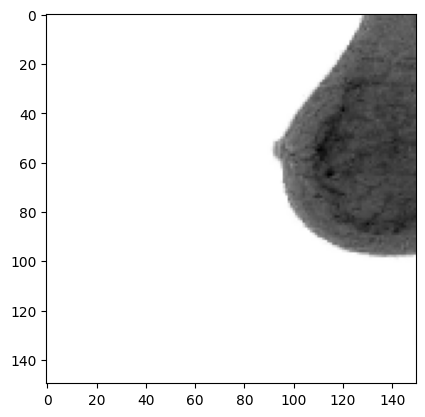

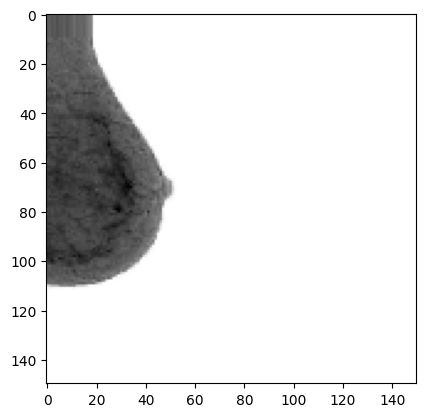

In [27]:
# This is module with image preprocessing utilities
from keras.preprocessing import image

fnames = [os.path.join(train_Malignant_dir, fname) for fname in os.listdir(train_Malignant_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

## Building  a network by using Data Augmentation

In [28]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

C:\anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

## compile the model 

In [29]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)

## Data preprocessing

In [30]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1803 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fitting the model

In [31]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50)

C:\anaconda3\envs\deeplearning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
 91/100 ━━━━━━━━━━━━━━━━━━━━ 2s 333ms/step - acc: 0.5471 - loss: 0.6880 

C:\anaconda3\envs\deeplearning\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 419ms/step - acc: 0.5475 - loss: 0.6878 - val_acc: 0.5600 - val_loss: 0.6850
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 262ms/step - acc: 0.5942 - loss: 0.6809
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 346ms/step - acc: 0.6108 - loss: 0.6699 - val_acc: 0.5660 - val_loss: 0.6771
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 256ms/step - acc: 0.6031 - loss: 0.6625
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 346ms/step - acc: 0.6118 - loss: 0.6587 - val_acc: 0.5450 - val_loss: 0.6968
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 259ms/step - acc: 0.6146 - loss: 0.6554
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 346ms/step - acc: 0.6093 - loss: 0.6604 - val_acc: 0.5780 - val_loss: 0.6759
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 255ms/step - acc: 0.6183 - loss: 0.6570
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 338ms/step - acc: 0.6345 - loss: 0.6447 - val_acc: 0.5880 - val_loss: 0.6675
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 26s 257ms/step - acc: 0.6455 

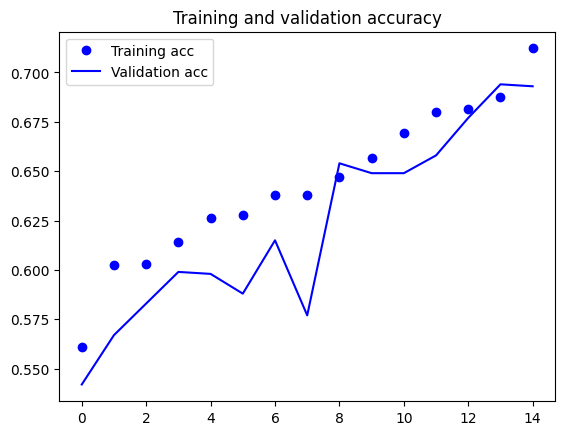

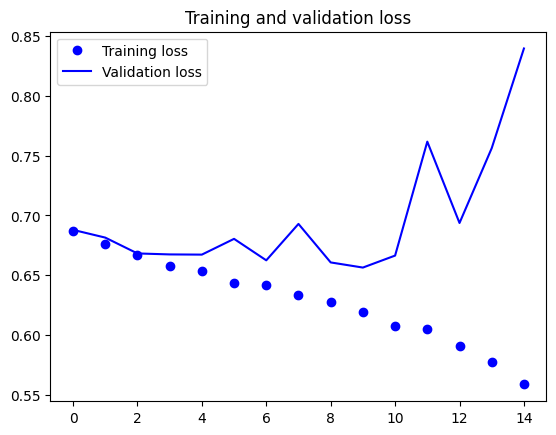

In [32]:
val_epochs = range(len(val_acc))  # or use len(val_loss), if val_acc missing

plt.plot(val_epochs, acc[:len(val_acc)], 'bo', label='Training acc')
plt.plot(val_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(val_epochs, loss[:len(val_loss)], 'bo', label='Training loss')
plt.plot(val_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## using pre Trained model VGG16

In [33]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,  # exclude the fully connected layers
                  input_shape=(150, 150, 3))


## Building Network 

In [34]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 16,812,353 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

## compile the model 

In [35]:
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)


In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/20
 91/100 ━━━━━━━━━━━━━━━━━━━━ 1:04 7s/step - acc: 0.5286 - loss: 0.7565

C:\anaconda3\envs\deeplearning\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 767s 8s/step - acc: 0.5291 - loss: 0.7527 - val_acc: 0.5000 - val_loss: 0.6984
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 608s 6s/step - acc: 0.5367 - loss: 0.6991 
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 682s 7s/step - acc: 0.5736 - loss: 0.6819 - val_acc: 0.5580 - val_loss: 0.6841
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 626s 6s/step - acc: 0.6041 - loss: 0.6686 
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 559s 6s/step - acc: 0.6172 - loss: 0.6550 - val_acc: 0.5960 - val_loss: 0.6722
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 476s 5s/step - acc: 0.6276 - loss: 0.6488
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 569s 6s/step - acc: 0.6293 - loss: 0.6462 - val_acc: 0.5770 - val_loss: 0.6685
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 465s 5s/step - acc: 0.6537 - loss: 0.6375
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 532s 5s/step - acc: 0.6472 - loss: 0.6223 - val_acc: 0.6020 - val_loss: 0.6522
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 460s 5s/step - acc: 0.6839 - loss: 0.5913
Epo

In [37]:
 model.save('Breast_VGG16.h5')

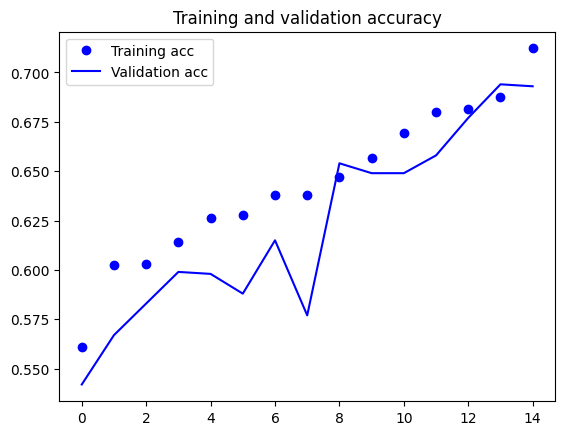

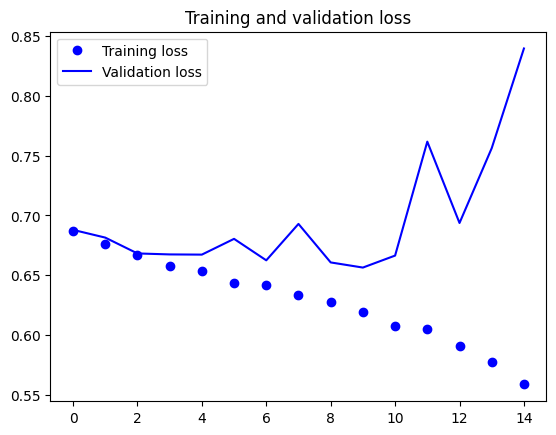

In [38]:
val_epochs = range(len(val_acc))  # or use len(val_loss), if val_acc missing

plt.plot(val_epochs, acc[:len(val_acc)], 'bo', label='Training acc')
plt.plot(val_epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(val_epochs, loss[:len(val_loss)], 'bo', label='Training loss')
plt.plot(val_epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()